# Aircraft analysis

## Introduction

In this analysis data of aircraft crashes will be used to analyze the risk associated with types of aircrafts
##### * commercial aircrafts
##### * private aircrafts
    
## Objective

Find aircrafts with the highest and lowest risk by make, model, category and manufacturer
#####  * what commercial aircraft has the highest and lowest risk
#####  * what private aircraft has the highest and lowest risk
#####  * what is the the survival rate of passengers on each type of aircraft
#####  * what manufacture makes the lowest risk aircraft
    

### Import the pandas and matplotlib module and assign to alias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

### Checking for encoding of csv file

making sure we know the encoding of the file that we will be using so we can make sure we  use the .read_csv() correctly

In [3]:
# using chardet module to detect the files encoding type
# Read a sample of the file

with open("AviationData.csv", "rb") as file:
    result = chardet.detect(file.read(100000))
    print(result)

#df = pd.read_csv("AviationData.csv", encoding=result['encoding'])


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


### Encoding of source data

as we can see above that encoding type is 'ascii',  but instructing the .read_csv() module to open in ascii returns errors due to columns 6, 7 and 28 having dtypes that are not recognized in ascii. after doing some research, the unknown characters to ascii were known to windows-1252 or cp-1252. low_memory=False to prevent a warning message from appearing. For better control, chunksize flag can be specified 

In [4]:
 aviation_data = pd.read_csv('AviationData.csv', encoding = 'cp1252', low_memory=False)
aviation_data.shape

(88889, 31)

### Subsetting data

All data in the source file has no use for our objective, therefore only data that can answer our questions will be used. lets also get some info about the data in order to know the columns we will be using

In [5]:
# creating subset of aviation_data that are relevant to analyzing safety risk. may add more if necassary

data_subset = aviation_data.iloc[:,[0,2,3,4,10,11,12,14,15,17,18,21,23,24,25,26,27,30]]
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [6]:
data_subset.head(5)

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,19-09-1996
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,26-02-2007
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,12-09-2000
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,16-04-1980


### Missing Data

There are some numerical columns that has missing data. We want to preserve the balance of overal data, so I would choose to use the mean to fill in missing values 

In [7]:
data_subset = data_subset.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

data_subset.info()

#data_subset.fillna(data_subset.median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       88889 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    88889 non-null  float64
 13  Total.Serious.Injuries  88889 non-null  float64
 14  Total.Minor.Injuries    88889 non-null

In [12]:
data_subset['Aircraft.damage'].unique()
data_subset['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

### Injuries of all levels

lets add a new column named ' Total.Injuries ' next to all types of injuries to get a general number for all injuries sustained for each observation. We will use this to calculate aircraft passenger survival rate.

In [9]:
data_subset.insert(loc=15, column='Total.Injuries', value=data_subset[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1))
                   
data_subset.head(2)


,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,2.0,0.0,UNK,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,4.0,0.0,UNK,19-09-1996


In [10]:
#lets get rid of NaN from 'Aircraft.Category'. we know that this has to be a categorical type of data, so would rather have
# 'Unkown' instead
data_subset['Aircraft.Category'] = data_subset['Aircraft.Category'].fillna('Unknown')
data_subset['Aircraft.Category'].unique()
data_subset['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

### What type of aircrafts has the highest and lowest risk?

Lets group the aircrafts by category then by damage. Damage will be on the y axis and category will be on the x axis.
Based on the graph below some aircrafts has no damage history. But lowest to highest risk are: Glider, Helicopter, Airplane, and unkown.

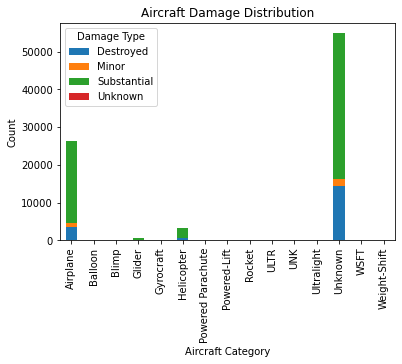

In [11]:
damage_counts = data_subset.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='Count')

pivot_table = damage_counts.pivot(index='Aircraft.Category', columns='Aircraft.damage', values='Count')

# Bar chart (uncomment)
#pivot_table.plot(kind='bar')
# Stacked bar chart
pivot_table.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage Distribution')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.legend(title='Damage Type')
plt.show()

### what aircraft has the highest and lowest risk between private and commercial

the business problem also specifies private and commercial aircrafts. The only column in the data that can be used to determine a private or commercial aircraft is the 'Purpose.of.flight' column. There are several values in this columns that does not specifically point to either category, so some research had to be done in order to determine every value in this column in to a private and commercial column

Lets create a dictionary that contains the Purpose.of.Flight column values to either Private, Commercial or Unknown

In [14]:
# Define the mapping dictionary
purpose_mapping = {
    'Personal': 'Private',
    'Business': 'Private',
    'Instructional': 'Private',
    'Executive/corporate': 'Private',
    'Skydiving': 'Private',
    'Other Work Use': 'Private',
    'Glider Tow': 'Private',
    'Air Race/show': 'Private',

    'Ferry': 'Commercial',
    'Aerial Observation': 'Commercial',
    'Aerial Application': 'Commercial',
    'Public Aircraft': 'Commercial',
    'Public Aircraft - Federal': 'Commercial',
    'Public Aircraft - Local': 'Commercial',
    'Public Aircraft - State': 'Commercial',
    'External Load': 'Commercial',
    'Banner Tow': 'Commercial',
    'Firefighting': 'Commercial',
    'Air Drop': 'Commercial',
    'Positioning': 'Commercial',
    'Flight Test': 'Commercial'
}

In [21]:
# Creating a new column by mapping values
data_subset['Private_or_Commercial'] = data_subset['Purpose.of.flight'].map(purpose_mapping)

# Filling any unmapped values with 'Unknown'
data_subset['Private_or_Commercial'].fillna('Unknown', inplace=True)

# Would rather this new column is next to the Purpose.of.flight column
data_subset.insert(12, 'Private_or_Commercial', data_subset.pop('Private_or_Commercial'))

data_subset.head(2)

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Private_or_Commercial,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,Unknown,Stinson,108-3,1.0,Reciprocating,Personal,Private,2.0,0.0,0.0,2.0,0.0,UNK,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,Unknown,Piper,PA24-180,1.0,Reciprocating,Personal,Private,4.0,0.0,0.0,4.0,0.0,UNK,19-09-1996


Let group by the Private_or_Commercial and Aircraft.damage in order show a visual representation of the answer to our question  (what aircraft has the highest and lowest risk between private and commercial). We can see below that a majority of the aircrafts that got damages are in the private aircraft category.

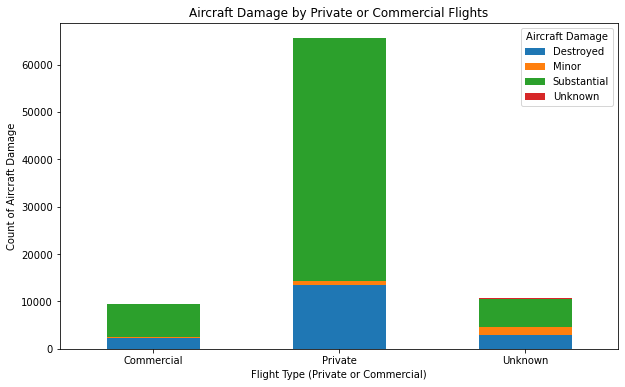

In [25]:

# Count occurrences of each Aircraft.damage type within Private_or_Commercial categories
damage_counts = data_subset.groupby(['Private_or_Commercial', 'Aircraft.damage']).size().unstack()

# Plot the data as a bar chart
damage_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

# Set labels and title
plt.xlabel("Flight Type (Private or Commercial)")
plt.ylabel("Count of Aircraft Damage")
plt.title("Aircraft Damage by Private or Commercial Flights")
plt.xticks(rotation=0)

# Add legend
plt.legend(title="Aircraft Damage")

# Show the plot
plt.show()
